# Statistics Study Guide

### Table of Contents
1. Exploratory Data Analysis
  * Data Preparation
  * Descriptive Statistics
2. Distributions (Univariate Analysis)
3. Bivariate Analysis 
4. Inferential Statistics
  * Point Estimates & Sampling Error (Estimation)
  * Hypothesis Testing  (*numerical*)
    * t-test (Two-Tailed)
    * Correlation
  * Chi<sup>2</sup> Tests (*categorical*)
    * Hypothesis Tests for Proportions (Goodness-of-Fit)
    * Test for Independence
  * ANOVA
5. Predictive Modeling
  * Linear Regression
  * Logistic Regression
6. Other Bio-Medical Topics
  * Time Series Analysis
  * Survival Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import random
import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis

**Purpose**: To reveal patterns, differences, & oddities in the data. Explore the structure of data in order to prepare variables for analysis. Communicates insights to audience quickly & succintly.

  * Validate the **form** & **quality** of data before proceeding with more serious analysis
  * Check for inconsistencies & identify limitations

Data cleaning & exploratory analysis are often preliminary steps toward the end goal of extracting insights from data through *statistical inference* or *predictive modeling*.

### Topics
1. Data Preparation
  * Dataset Exploration 
  * Data Preprocessing
2. Descriptive Statistics
  * Central Tendency
  * Dispersion
  * Skewness & Kurtosis
  * Effect Size
3. Distributions
4. Bivariate Analysis

## Data Preparation
### Dataset Exploration
Get a sense of the dataset's structure such as its variables and their data types, range of values, etc.

1. Dimensions: `DataFrame`**`.shape()`**
2. Variable Data Typea: `DataFrame`**`.dtypes`**
3. Structure:
  * `DataFrame`**`.info()`**
  * `DataFrame`**`.head()`**
  * `DataFrame`**`.tail()`**

### Data Preprocessing
Identify missing or strange values or outliers, which may negatively affect stratisical tests and models.

#### Missing Values
Detect missing values by comparing the counts of each column.
1. Find characteristics of each column & *compare count*:  
  `DataFrame`**`.describe()`**
2. Identify indices of rows passing the boolean condition (`True`):  
  `np.where( Series.isnull() == True )`

The tricky part is how to handle missing values. Simply removing rows with missing data omits a lot of valuable information.
1. Categorical Data: *create N/A category*
2. Numeric Data: tricky as there a variety of approaches
  * replace null values with **`0`**
  * replace null values with a **central value** (e.g. `mean` & `median`)
  * impute values (estimate using statistical/predictive modeling)

#### Null Values
1. View `null` values:  
  `DataFrame`**`.isnull()`**
2. Fill `null` values:  
  `DataFrame`**`.fillna()`**  
  `DataFrame`**`.replace()`**

#### Unnecessary Variables
Removing unnecessary variables reduces complexity & improves computation time.

*Examples*: 
  * **Identifiers**: arbitrary with no purpose other than identification
  
## Descriptive Statistics (Summary Statistics)
Generate statistics that summarize the data's important features, *often witha single number*. Producing descriptive statistics is a common 1st step after cleaning & preparing data for analysis.

Summary Statistics: `DataFrame`**`.describe()`**

### 1. Measures of Center
Central tendency are stats that gives a sense of the "middle" of a numeric value or the cetner of a distribution (*mainly **mean** & **median***).  n other words, centrality measures gives a sense of a *typical* value you'd expect to see. 
#### Mean 
Mean is the average. It's *impacted by outliers*, tending to  get pulled in the direction of the skew.
    
Method: **`.mean()`**

#### Median (Quartile 2)
Median is the middle value (splitting distribution in halves), but it's not impacted by outliers and resists the effects of skew and outliers. Hence, it's a more "robust" central statistic. It gives a *better sense of the typical value* in  a distribution with significant skew or outlier.

Method:  **`.median()`**

#### Mode
Mode of the variable is the value that appears most *frequently*. It is better at handling categorical variables, unlike **mean** & **median**.

Method: **`.mode()`**

### 2. Measures of Spread (Dispersion)
Statistics that describe how the data *varies* or its variability/scatter/spread. Measures of spread gives a sense of how much the data tends to diverge from the typical value (**median** & **mean**).

The 2 most common measures of spread are **standard deviation** and **variance**. 
#### Standard Deviation: 
The square root of the variance, which is a more interpretable version as its units are expressed in the same units as the mean.
Method: **`.std()`**

#### Variance
Variance of a distribution is the average of the squared deviations (differences) from the mean.
Method:  **`.variance()`**

#### Max & Min
The maximum & minimum values of the feature.
  * Max: **`max()`**
  * Min: **`min()`**

#### Range
Distance between the *max* and *min* values.  
Method: `DataFrame[<var>].max()` - `DataFrame[<var>].min()`

#### Interquartile Range (Q3-Q1)
The midspread or middle 50% range between the 1st (25%) and 3rd quartile (75%).  
Method 1: `iqr = np.percentile(<var>, 75) - np.percentile(<var>, 25)`
Method 2: `iqr = DataFrame[<var>].quantile(0.75) - DataFrame[<var>].quantile(0.25)`

### 3. Skewness & Kurtosis
Beyond the measures of *center* and *spread*, descriptive stats include measures that give a sense of the **shape of distribution**, summarizing with numerical measurements.

Skewness & kurtosis takes the idea of variance a step further. Variance invovles the squaring of deviations from the mean. Whereas,
  * **Skewness** involves *cubing* deviations from the mean
  * **Kurtosis** involves raising deviations from the mean to the *4th power*

#### Skewness
Skewness measures the skew or *asymmetry of a distribution*.  
Method: **`.skew()`**

#### Kurtosis
Kurtosis measures the "peakedness" of a distribution. Distributions with sharp peaks would have higher values. Variables with a flat distribution has *negative* kurtosis while those with the presence of peaks have *positive* distributions.
Method: **`.kurt()`**

### Effect Size
Effect Size is a summary statistic intended to *describe the size of an effect* or the difference between 2 groups. 

2 Approaches:
  1. **Difference in Means**
  2. **Cohen's `d` Statistic**
  
#### Difference in Means
diff<sub>means</sub> = mean<sub>group 1</sub> - mean<sub>group 2</sub>

#### Cohen's `d` Statistic
Alternative method to convey the **size of effect** by comparing the difference between groups to the variability within groups. The **Cohen's `d` statistic** measures the difference in means *measured in standard deviations*.

`d = (mean`<sub>group 1</sub> `- mean`<sub>group 2</sub>`) / (pooled Std)`

In [2]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

# Distributions
Distributions are *descriptions of the variables*. In other words, they define the values of a variable. They report the values that appear in the dataset and how often each value appears.

### Topics
  1. **Histogram**: frequency/count
  2. Probability Distributions
    * Functions 
      * **Probability Mass Functions**: probability
      * **Cumulative Distribution Functions**: cumulative probabilities (percentiles)
      * Probability Density Functions
     * Distribution Types
       * Uniform
       * Normal
       * Binomial
       * Geometric
       * Exponential
       * Poisson

## Histogram
A plot that shows the ***frequency*** of each value, esesentially depicting the variable's distribution (of values). This complete descritption of a sample's distribution allows us to reconstruct the sample's values, if need be *although not in the original order*.

### Methods
Compute frequency of each value

#### 1. Python Dictionary's **`get()`** method
The method `get()` returns a value for the given key. If the key is not available, it returns the default value (`None`).  

`dict.get(<key>, default=None)`

In [3]:
t=[0,1,2,3,0,2]

hist_d = {}
for x in t: # t is a sequence of values
        hist_d[x] = hist_d.get(x, 0) + 1 # dict get method to count each value

print hist_d

{0: 2, 1: 1, 2: 2, 3: 1}


#### 2. Counter class
Alternative approach to Python dictionary, but implementing a Counter class.

In [4]:
from collections import Counter
counter = Counter (t)

print counter

Counter({0: 2, 2: 2, 1: 1, 3: 1})


#### 3. Pandas Method `value_counts()`

In [5]:
import pandas as pd
df = pd.DataFrame(t,columns=['value'])
df.value.value_counts().sort_index()

0    2
1    1
2    2
3    1
Name: value, dtype: int64

### Plot
Histogram plots easily identify the most common values (**mode**) and the shape of the distribution. Unfortunately, rare vaues are not always apparent.
1. Histogram: **`plt.hist(<var>)`**
2. Bar Plot: **`plt.bar(<var.x>, <var.y>)`**

## Probability Distributions
A probability distribution describes how a random variable is distributed, telling which values a random variable is most likely to take on and which values are less likely.  

Probability measures how likely it is for an event to occur on a scale frmo **`0`** (event never occurs) to **`1`**(event always occurs). 

Using probability, instead of simply frequency (*histograms*), prevents the distribution frmo being mislead by differences in sample size.

### Probability Mass Functions (PMFs)
Another way to represent distribution by *mapping each value to its **probability***. 

**Probability** is a frequency expressed as a *fraction of the sample size* (n). PMFs involved *normalization*, which is th process of dividing a frequency by a sample size(n) to get a probability.
  * sum of sample's probabilities = 1.0
  
#### Limitations
PMFs work well if the number of values is small. As the number of values increases, the probability associated with each value gets *smaller* and the **effect of random noise increases*.

Some patterns are hard to comapre visually, which is a *limitation* of PMFs.

##### Solutions to Limitations
1. **Binning the Data**  
  Divide the range of values into non-overlapping intervals and counting the number of values in each bin.
2. **Cumulative Distribution Function (CDF)**

In [8]:
def pmf(dictionary):
    """Takes a histogram dictionary (frequency) and 
    create a PMF dictionary (probabilities).
    
    """
    n = float(sum(dictionary.values()))
    pmf_d = {}

    for x,freq in dictionary.items():
        pmf_d[x] = freq / n
    return pmf_d

#### Plot
1. **Bar Graphs**: most useful if the number of values in the PMF is small
2. **Step Function**: useful if the number of values in the PMF is large & PMF is smooth

### Cumulative Distribution Function (CDF)
Function that maps a value (**percentile**) to its **percentile rank**. The CDF(x) for a particular value of x is *the fraction of values in the distribution less than or equal to x*.  

**Percentile**: The value associated with a given percentile rank.  
**Percentile Rank**: The percentage of values in a distribution that are less than or equal to a given value.
  * rank of a value (percentile) in a given set of values   
  
**Note**: Easier to compute the *percentile rank*, given the value (*percentile*). Much more difficult to compute the *percentile*, given the *percentile rank*.

#### Method: statsmodels ECDF
`statsmodels.distributions.empirical_distribution.ECDF()`

`samp_ecdf = ECDF(<var>)`
  * samp_ecdf.x = **percentiles** (values) 
  * samp_ecdf.y = **percentile ranks**
  
#### Plot
Step or line plots of CDFs provide a visual representation of the shape of distibution. CDF plots provide information much clearer than PMFs.

Common values appear as steep/vertical sections of the CDF plot.

The `y-axis` of a CDF depicts the probability ([0, 1]) of a value's percentile rank as opposed to frequency probability of PMFs.

### Probability Density Functions (PDF)
Function that maps a value to its *probability density*. It shows the probabilities of a random variable for all of its possible values. In other words, it's a way to *map outcomes of random process to numbers*, quantifying the random process (e.g. flipping a coin) to some variable. 

Area under the PDF curve is always 1.0.

**Purpose**: PDFs are useful for generating random data, modeling random events, and aiding stats tests and analysis.

**Note**: Evaluating the PDF for a particular value of `x` is  not usually useful. The result is not a probability, but a probability density. 

#### Approximation of PDF
##### 1. Kernel Density Estimation (KDE)
An algorithm that takes a sample & *estimates the PDF* that fits the data (random variable).

##### 2. PMF
PMF<sub>PDF(x)</sub> = PDF<sub>x</sub> / PDF<sub>total</sub>

#### Generating Random Data with Uniform Distribution
The **`distribution.rvs()`** function generates random numbers from the *specificed distribution*.  
`scipy.stats.uniform.rvs(size, loc = , scale = 10)`
  * `size`: count/length of sequence
  * `loc`: μ (mu) - mean
  * `scale`: σ (sigma) - standard deviation
  
##### Find PDF for a given value of `x`
The PDF function gives the probability density (*height of the distribution*) at a given `x` value. For a uniform distribution, the PDF is falt and all `x` vlues within its range have the same probability density. All `x` values outside of the range have a probability density of 0.

`scipy.stats.distribution.pdf(x, loc=0m scale=10)`

**Note**
1. For ***continuous*** PDFs, use **`.pdf()`**
2. For ***discrete** PDFs, use **`.pmf()`**

#### Uniform Distribution
A probability distribution where each value within a certain range is **equally likely** to occur. Values outside of this range never occur. A PDF with *normal distribution* plot would appear *flat* since no value is any more likely to occur than another (*hence, it does not have any more density*).

##### SciPy Package: `uniform`
`scipy.stats.uniform`

**Example**  
Generate 10,000 data points from a *uniform distribution* spanning from the range [0, 10]. 

The density of the uniform data is essentially level, meaning that any value has the *same probability of occurring*.

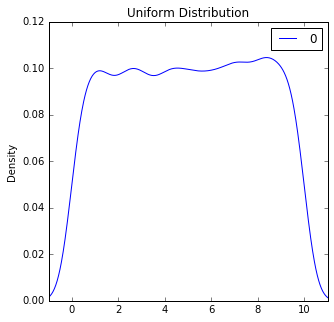

In [16]:
# Generate 10000 random data points
uniform_data = stats.uniform.rvs(size=10000, loc = 0, scale=10)     
# Plot the distribution
pd.DataFrame(uniform_data).plot(kind="density", figsize=(5,5), xlim=(-1,11), 
                                label='PDF')
plt.title('Uniform Distribution')

##### Find PDF for a given value of `x`
Find PDF of `x` from data with a *normal distribution*.

In [23]:
for x in range(-1, 12, 3):
    pdf = stats.uniform.pdf(x, loc=0, scale=10)
    print "Density at x = %d is %.1f" % (x, pdf)

Density at x = -1 is 0.0
Density at x = 2 is 0.1
Density at x = 5 is 0.1
Density at x = 8 is 0.1
Density at x = 11 is 0.0


#### Normal (Gaussian) Distribution
The normal or Gaussian distribution is a ***continuous*** probability distribution characterized by a **bell-shaped curve**. A normal distribution is defined by its *center* (mean) and *spread* (standard deviation). The bulk of the observations generated with a *normal distribution* lie near the mean, which is at the exact center of the distribution.

**Rule of Thumb**
  * 68% of data lies within **1 standard deviation**
  * 95% of data lies within **2 standard deviations**
  * 99.7% of data lies within **3 standard deviations**

##### SciPy Package: `norm`
`scipy.stats.norm`

#### Binomial Distribution
The binomial distribution is a ***discrete*** probability distribution that models the outcomes of a given number of random trials of some experiment or event (e.g. coin flip).

The binomial distribution tells how likely it is to *achieve a given number of successes in `n` trials of the experiment.

##### SciPy Package: `binom`
`scipy.stats.binom`

##### Example: Coin Toss
Model flipping a fair coin 10 times with a binomial distribution where
  * number of trials = 10,000
  * probability of success = 0.5

col_0   0    1    2     3     4     5     6     7    8   9   10
row_0                                                          
counts  14  118  406  1180  2021  2530  2050  1110  464  95  12


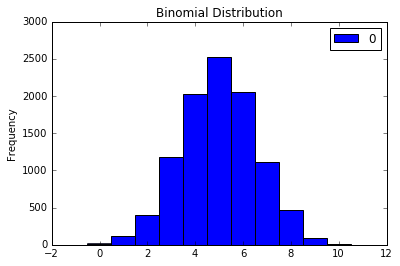

In [33]:
# Generate random values with binomial distribution - rvs()
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

# Frequency Table
print( pd.crosstab(index="counts", columns= fair_coin_flips))

# Plot
pd.DataFrame(fair_coin_flips).plot(kind='hist', range=(-0.5,10.5), bins=11)
plt.title('Binomial Distribution')
plt.show()

Because the *binomial distribution* is discrete, it **only takes integer values**. Thus, allowing the summarizaiton of binomial data with a frequency table and its distribution with a histogram.

The histogram shows us that a binomial distribution with a **50% probability of success** is roughly symmetric, with the most likely outcomes lying at the center.

This is similar to a **normal distribution**, but altering the success probability will change the binomial distribution (*no longer symmetric*).

#### Geometric & Exponential Distributions
The geometric & exponential distributions model the *time it takes for an event to occur*. 

##### Geometric Distribution
The distribution is **discrete** and *models the number of trials it takes to achieve a success in repeated experiments with a given probability of success*.

**SciPy Package**: `geom`
`scipy.stats.geom`

**Example**  
The number of trials it takes to get a success (*heads*) when flipping a fair coin

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13
row_0                                                              
counts  4977  2519  1267  655  298  134  77  44  18   3   5   1   2


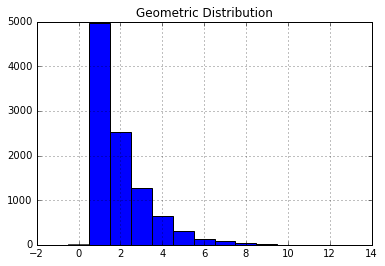

In [37]:
random.seed(12) # set random seed

# Generate random numbers with geom distribution
flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1)
plt.title('Geometric Distribution')
plt.show()

The distribution looks similar to what we'd expect: it is very likely to get a heads in 1 or 2 flips, while it is very unlikely for it to take more than 5 flips to get a heads. In the 10,000 trails we generated, the longest it took to get a heads was 13 flips.

##### Exponential Distribution
A **continuous** analog of the geometric distribution and models the *amount of time you have to wait before an event occurs given a certain occurrence rate*.

**SciPy Package**: `expon`
`scipy.stats.expon`

#### Poisson Distribution
The Poisson distribution models the probability of *seeing a certain number of successes within a time interval*, where the time it takes for the next success is modeled by an exponential distribution.

The Poisson distribution is typically used to model *traffic*, such as the
  * number of arrivals a hospital can expect in an hour's time
  * number of e-mails expected to receive in a week
  
##### SciPy Package: `poisson`
`scipy.stats.poisson`

**Example**  
Poisson distribution with an **arrival rate** of 1 per time unit.

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3693  3689  1823  594  166  32  2  1


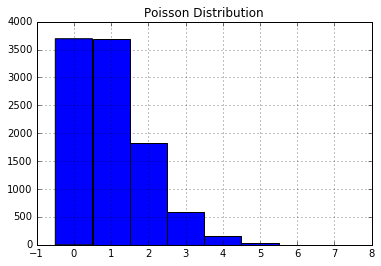

In [39]:
random.seed(12)

# Generate random data with Poisson distribution
arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1)
plt.title('Poisson Distribution')
plt.show()

The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. 

**Further Considerations**  
When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric.

# Bivariate Analysis
Explore relationships between 2 variables; if a relationship exists then knowing one variable will provide informatoin about the other.

### Topics
1. Plots
  * Scatter Plots
  * Hexbin Plots
2. Covariance
3. Correlation
  * Pearson's Correlation (**linear**)
  * Spearman's Correlation (**rank**)
  * Correlation & Causation

## Bivariate Plots
### Scatter Plots
Simplest method of checking for a relationship between 2 variables. Scatter plots provide a *general impression* of relationship between variables.

#### Method: `plt.scatter()`
`plt.scatter(<var1>, <var2>)`

#### Limitations
Scatter plots are not the best representation of data because data are *packed into columns*. Information is lost as information is rounded off into the nearest bins.

### Hexbin Plots
Divides the plot into hexagonal bins & colors each bin according t how many data points fall in it. It shows the shape of the relationship well & is efficient for large datasets.

#### Method: `plt.hexbin()`
`plt.hexbin(<var1>, <var2>, cmap=matplotlib.cm.Blues)`

#### Limitations
Hexbin plots make outliers invisible.

## Covariance
A measure of *tendency of 2 variables to vary together*. If the 2 variables vary together, their deviations tend to have the same sign.

Covariance is the dot product of the deviations, divided by their length. 
  * a *positive* dot product indicates that the deviations have the same sign. 
  * a *negative* dot product suggests a tendency to vary in the opposite directions.
  
### Shortcomings
Covariance is seldom reported as a summary statistic due to difficulties in its interpretations. Furthermore, the units of covariance is the product of the units of both variables (e.g. kg-cm), which has no sense.

**Solution**: Correlation coefficients are *standardized versions* of covariance that are much easier to interpret.  

## Correlation
A statistic intended to quantify the *strength of relationship* between 2 variables.

#### Challenges
  * Variables are often not expressed in the **same units**
  * If variables are both expressed in the same untis, they come from **different distributions**  
  
**Solution**: Transform/standardize *each value* of the variables to a **standard score** using the *Pearson's Correlation Coefficient* (**standard score**) or *Spearman Rank Correlation Coefficient* (**rank**).

### Pearson's Correlation
Measure's **linear relationships** by computing *standard scores*.
  * **standard scores**: values standardized to be expressed in *standard deviations from the mean*.

### Limitations
1. It cannot measure nonlinear relationships.
  * tends to *underestimate* strength of relationship
2. It'ss not robust in the presence of outliers. 

*Assumptions*:  
It's only applicable when:
  * linear relationship between 2 variables
  * variables are roughly normal

#### Pearson's Correlation Coefficient (`p`)

* **[-1, +1]** -- Pearson's Correlation is always between -1 & +1
  * If p is **positive** ( p > 0), the correlation is positive. This means when 1 variable is high, the other tends to be high.
  * If p is **negative** ( p < 0), the correlation is negative. Thus, when 1 variable is high, the other tends ot be low.
* **Magnitude** of p indicates the strength of the correlation.
  * If p is 1 or -1, the variables are perfectly correlated. Thus, meaning if you know 1 variable, you can make a perfect prediction about the other.
  
#### Methods
1. NumPy: **`np.corrcoef(<var1>, <var2>)`**
2. Pandas: **`pd.DataFrame.corr(method='pearson')`**
3. SciPy: **`scipy.stats.pearsonr(<var1>, <var2>)`**

### Spearman's Correlation
Measures that relationships between variables by computing the **rank** (standardized value) of each value, which is its index in the sorted sample.
  * **rank**: index where an element appears in sorted list
  
It's an alternative solution to Pearson Correlation that mitigates the effect of outliers & skewed distributions.

#### Methods
1. Pandas: **`pandas.DataFrame.corr(method='spearman')`**
2. SciPy: **`scipy.stats.spearmanr(<var1>, <var2>)`**

### Correlation & Causation
If variables `A` & `B` are correlation, there are 3 possible explanations (**causal relationships**):
  * `A` causes `B`
  * `B` causes `A`
  * *some other factors* cause both `A` & `B`

#### Rule: "*Correlation does not imply causation*"
Correlation alone does not distinguish between explanations of causal relationships. In other words, correlation values do not tell you which explanations are true.

#### Evidence of Causation
Other evidence must be provided to demonstrate that the correlation indicates causation.

1. **Time**
  * If `A` comes before `B`, then `A` can cause `B`, *but not vice-versa*
  * The order of events can help us infer the direction of causation, but *does not preclude the possibility that something else causes both `A` & `B`*.
2. **Randomness**
  * If you divide a large sample into 2 groups at random & compute the means of almost any variable, you expect the difference to be small.
  * If the groups are nearly identical inall variables but one, you can eliminate spurious relationships. This works even if you don't know what the relevant variables are, but wrks even better if you do (you can check that the groups are identical).

# Inferential Statistics
Use *point estimates* of a random sample to draw insights about the larger encompassing population.


## Point Estimates & Sampling Error
**Statistical inference** is the process of analyzing *sample data* to gain insight about the population, from which the data was collected. In data analysis, we are interested in the characteristics of some large population, but collecting data on the entire population may not be feasible. Instead, a subset or sample of the population can be used to make *inferences about the population* as a whole.

**Main Idea**: Estimating population parameters through *sampling* is a simple, but powerful form of inferencing. Point estimates + error margins creates confidence intervals that capture the true population parameters with high probability.
  * Sampling Distribution provides a sense of *how reliable an estimate is*
  * Confidence Intervals & RMSE *quantify the variability* in the estimate due to random sampling


### General Rule of Thumbs
  * Using the **sample mean** ($\bar{x}$) to estimate the mean is more effective than using the median. It *minimizes RMSE* in the long-run.
  * Using the **median** to estimate is more robust in the *presence of outliers or large errors*.

## Point Estimates
Estimates of *population parameters based on sample data*. For example, the **sample mean** (*average of a sample*) can be used as a point estimate as the mean of a population. Although, the sample mean is not usually the exact same as the population mean. The difference can be attributed to a variety of factors:
  * poor survey design
  * biased sampling methods
  * randomness inehrent to drawing a sample from a population
  
*Main Point*: Point estimates provides a fairly accurate estimate/inference of the population by sampling a relatively small subset of observations.

| | Sample Statistic | Population Parameter |
|:---|:--:|:--:
|**Mean** | μ | x̄ |
|**Standard Deviation** | σ | *s*|

## Sampling Distributions & the Central Limit Theorem
**Sampling Distribution** (of estimator): the distribution of a statistic if an epxeriment is repeated many times. It shows how much estimates vary if the experiment was ran repeatedly.

Unfortunately, most real world data is often *not normally distributed* (majority of the data clustered within a few standard deviations of the mean). The distribution of a sample tends to mirror the distribution of the population. In other words, a sample taken from a population *with a skewed population* will also tend to be skewed.

### Central Limit Theorem
The theorem states that the distribution of many sample means, *known as sampling distribution*, will be **normally distributed**. This rule *holds true*, even if the underlying distribution of the population itself is **not normally distributed**. Thus, the sample mean should be treated s if it were drawn with a normal distribution.

## Sampling Error
Sampling errors are errors in estimates due to the *limited sample size* & *variation due to chance*. The variation in an estimate is caused by random selection.

To quantify sampling error, the sampling process is simulated with *hypothetical values* of the population parameters (**μ** and **σ**) to see how much the sampling statistic varies (**$\bar{x}$** & ***s***).

### Types
1. **RMSE (Standard Error)** - quantifies variability 
2. **Confidence Intervals** - represents expected range

### RMSE (Standard Error)
Standard Error is the measure of how far we expect the estimate *to be off, on average*. It quantifies variability due to sampling error (but not other soruces of error).

#### Calculation
`np.sqrt(np.mean((predictions-targets)**2))`

Standard error is essentially the **RMSE**, or squared root of the **Mean Squared Error (MSE**), providing a measure of estimation error. The goal is to choose a *sample mean* that **minimizes the RMSE** or average error of the estimation process.


### Confidence Intervals
Point estimates provides a rough idea of the population parameter (e.g. mean), but estimates are *prone to error* and taking multiple samples to get improved estimates is not always feasible.

**Confidence Interval**: a range of values above & below a point estimate that captures the true population parameter *at some predetermined confidence level*.  

  * For example, a **95%** confidence level provides a 95% chance of capturing the true population parameter with a point estimate. In other words, it's expected that the confidence interval captures the true population mean *95% of the time*. The interval would miss the true mean 5% of the time.
  * Higher confidence levels result in a wider confidence intervals

*Example*: A **90%** confidence interval are the values from the **5th percentile** to **95% percentile**.

#### Calculation
Calculate the confidence interval by adding & subtracting the **margin of error** from the point estimate to create a range. The calculation of margin of error depends on whether the *standard deviation of the population is available*


#### Method: SciPy Package - `interval`
`scipy.stats.<distribution>.interval`

In [2]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = 10,         # Sample mean
                 scale = 3)             # Standard deviation estimate

(3.8083043151159384, 16.19169568488406)

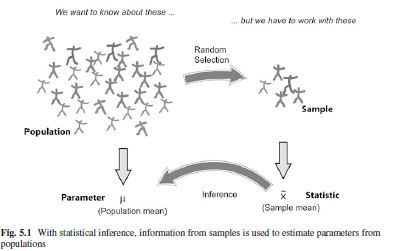

In [6]:
from IPython.display import Image, display
import platform

if platform.system()=='Linux':
    display(Image(filename='/media/cpnguyen/Windows8_OS/Users/Calvin/Desktop/HS 699/code/hyptest.JPG'))
if platform.system()=='Windows':
    display(Image(filename='C:\Users\Calvin\Desktop\HS 699\code\hyptest.jpg'))

## Hypothesis Testing (*Significance Testing of an Apparent Effect*)
**Hypothesis Testing**: the process of determining whether an ***apparent effect*** is statistically significant. It's essentially a framework determining whether observed data deviates from what is expected.

### Topics
1. t-Tests
  * One-Sample Hypothesis Testing
  * Two-Sample Hypothesis Testing
  * Paired t-test

#### Fundamental Question
*Whether the effects we see in the sample are likely to appear in the larger population?*

**Solutions**:
  1. Fisher Null Hypothesis Testing
  2. Neyman-Pearson Decision Theory
  3. Bayesian Inference

### Classical Hypothesis Testing Framework
**Goal**: Answer the question "*Given a sample & an apparent effect, what's the probability of seeing such effect by chance?*"

#### Framework
1. Quantify the size of the **apparent effect** by selecting a **test statistic**.
2. Define the **null hypothesis** (H<sub>0</sub>).
  * Typically, a model that is based on the assumption that the *apparent effect is not real* (**due to chance**).
3. Compute the **test-statistic** & **p-value**.
4. Interpret the results to *accept/reject* the null hypothesis. As a result, determining **statistical significance** of the effect.
  * An effect that's *statistically significant* is **unlikely to occur by chance**.

#### Logic: *Proof by Contradiction*
To prove a mathematical claim, you assume temporarily that the claim is False. If the assumption leads to a contradiction, then it's concluded that the claim must be true.

Similarly to test a hypothesis (e.g. "Effect is real"), it's assummed temporarily that the effect *is not real* (**H<sub>0</sub>**). Based on this assumption, the probability of the *apparent effect being due to chance* (**p-value**) is computed. A low p-value concludes that H<sub>0</sub> is *unlikely to be true* and the effect is statistically significant.

#### p-value
The probability that an **effect could occur by chance**.
  * **p-value ≤ 0.05** (small p-value): the effect is considered significant. P-value indicates strong evidence against the H0.
    * Reject H<sub>0</sub>. There is a statistically significant difference.
    * If the p-value is **low**, the *effect is said to be **statistically significant***. Meaning that it's unlikely to have occurred by chance. Thus, we infer that the effect is *more likely to appear in the larger population*.
  * **p-value > 0.10** (large p-value): the effect can plausibly be *explained by chance*. P-value indicates weak evidence against the H0, thus failing to reject it.
    * "Accept" H0. **No significant difference** and the sample mean is indicative of the population.
  * **0.05 < p-value < 0.10**: borderline. Data does not provide strong evidence for conclusions.
    * p-value is marginal.

**Note**: arbitrary threshold (5%) depends on choice of the test statistics & model of null hypothesis. P-values should not be considered precise measurements.


### Errors
In classifical hypothesis testing, an effect is considered *statistically significant* if the **p-value** is below some threshold (significance level).

#### False Positive Rate (Type I  Error)
The probability of *wrongly* considering an effect significant.
  * The conclusion that an effect is real when it is not. Reject H<sub>0</sub> when it's actually true.
  * The effect is actually due to chance.

`FPR = p-value threshold`
  * If the threshold is 5% (α), then **FPR** is 5%. Performing a hypothesis test with a 5% threshold, it is expected that a **false positive** will occur **1 in 20 times**.

#### False Negative Rate (Type II Error)
The probabiltiy of the hypothesis test failing, when the effect *is real*.
  * The conclusion that an effect is due to chance, when it's actually statistically significant.
  * Failure to reject the H<sub>0</sub>, when it's actually false.

### One-Sample t - Test
**Purpose**: Detect a difference between a *single* sample mean (**x̄**) & a known population value (**μ**).

**Fundamental Question**: *Is our observed sample mean different than what would be expected under the null mean (population mean)?*

*Assumptions*:
  * Normal population distribution
  * Observations are independent

#### SciPy: `scipy.stats.ttest_1samp()`
`scipy.stats.ttest_1samp(sample_obs, pop_mean)`  

Parameters:
  * sample observation
  * population mean (expected value in null hypothesis)  
  
Returns:
  * t-statistic (test statistic)
  * p-value

#### Example: Coin Toss
**Hypothesis**
  * **H<sub>0</sub>**: The coin is fair (q = 0.5). Difference was due to chance.
    * The sample mean points to the population, where μ=x̄coin flip.
  * **H<sub>A</sub>**: The coin is not fair (q != 0.5).
    * The sample mean does not point to the population, where μ=x̄.
    * There is a *statistically significant* difference.

**Results**
  1. **Low p-value** (p-value ≤ 0.05)
    * Reject the H<sub>0</sub>
    * Apparent effect is statistically significant.
  2. **Large p-value** (p-value > 0.05) 
    * Failed to reject the H<sub>0</sub>
    * Apparent effect is due to chance.

### Two-Sample t - Test
**Purpose**: Compare 2 independent samples to see what extent these samples come from a population with the same mean (μ<sub>1</sub> & μ<sub>2</sub>). 
  * In other words, test if the *apparent effect* (**difference**) between the 2 groups are statistically significant or due to chance.
 
#### SciPy: `scipy.stats.ttest_ind()`
`scipy.stats.ttest_ind(sample_a, sample_b, equal_var=True)`
Parameters:
  * sample `a` array
  * sample `b` array
  * equal_var: if True, perform standard independent 2 sample test assumming equal population variances.  

Returns:
  * t-statistic (test statistic)
  * p-value
  
#### Example: Difference in Pregnancy Lengths between Firsts & Others Newborns
**Apparent Effect**: First newborns have longer pregnancy lengths than Others babies.

**Hypothesis**
  * **H<sub>0</sub>**: The means of pregnancy lengths for both study samples point to the same population, where μ<sub>firsts</sub> = μ<sub>others</sub>.
  * **H<sub>A</sub>**: The means of pregnancy lengths for both study samples do not point to the same population, where μ<sub>firsts</sub> ≠  μ<sub>others</sub>.
  
**Results**
  1. **Low p-value** (p-value ≤ 0.05)
    * Reject the H<sub>0</sub>
    * Apparent effect (*difference in pregnancy lengths*) is **statistically significant**.
  2. **Large p-value** (p-value > 0.05) 
    * Failed to reject the H<sub>0</sub>
    * Apparent effect (*difference in pregnancy lengths*) is **due to chance**.
    
### Paired Comparisons Tests (Paired t - Test)
**Purpose**: Compare 2 sets of *repeated measures* (same parameters) on the same subjects/sample at different times or under different conditions

*Assumptions*:
  * Hypothesis test on data from non-independent samples
  * Same subjects who have a factor measured *before* & *after* treatment
  * **Variable of Interest**: difference between individual pairs (repeat sampling)
  
#### SciPy: `scipy.stats.ttest_rel()`
`scipy.stats.ttest_rel(a, b, axis=0)`  
Parameters:
  * a: array of sample `a`
  * b: array of sample `b`  
  
Returns:
  * t-statistic (test statistic)
  * two-tailed p-value

#### Example: Weight *Pre-* & *Post-* Abdominal Surgery
Measured the *weight* (**variable of interest**) repeatedly, *before* surgery and *5 months post* surgery.

**Hypothesis**
  * **H<sub>0</sub>**: The population mean weight change from before & after the surgery is 0 or positive, so μd ≥ 0.
  * **H<sub>A</sub>**: The population mean weight change from before & after the surgery is negative, so μd < 0.

**Results**
  1. **Low p-value** (p-value ≤ 0.05)
    * Reject the H<sub>0</sub>
    * Apparent effect (*change in weight*) is **statistically significantly** affected by surgery.
  2. **Large p-value** (p-value > 0.05) 
    * Failed to reject the H<sub>0</sub>
    * Apparent effect (*change in weight*) is **due to chance**.
    
### Other Hypothesis Tests: Correlation
**Purpose**: Determine if the apparent effect (*correlation between 2 variables*) actually exists/is statistically significant.

**Hypothesis**
  * **H<sub>0</sub>**: There is no correlation between <var 1> and <var2>.
  * **H<sub>A</sub>**: There is a correlation between <var 1> and <var2>.  
  
**Results**
  1. **Low p-value** (p-value ≤ 0.05)
    * Reject the H<sub>0</sub>
    * Apparent effect (*correlation*) is **statistically significant**. There is a relationship/correlation between the 2 variables.
  2. **Large p-value** (p-value > 0.05) 
    * Failed to reject the H<sub>0</sub>
    * Apparent effect (*correlation*) is **due to chance**. There is actually no relationship bvetween the 2 variables.    

## Chi<sup>2</sup> Tests
Chi<sup>2</sup> investigates the *differences between **categorical variables***, as opposed to numerical values of t-tests (differences between numerical values (e.g. sample means). 
  
### Topics
1. **Goodness-of-Fit Test** (Hypothesis Test for Proportions)
  * Differences in distributions of categorical variables with the same categories (**Goodness of Fit**)
2. **Independence Test**
  * Dependence between cateogrical variables
  
### Limitations
The Chi<sup>2</sup> test statistic simply indiciates that there is a difference in the effect (**proportions** or **independence**), but *does not provide anything specific about what the difference is*.
  
### Chi<sup>2</sup> Goodness-of-Fit Test
**Purpose**: Tests whether the distribution (*proportion*) of a sample's categorical data matches an *expected distribution*.

The Goodness-of-Fit Test is an analog of the *one-way t-test*, but for **categorical variables**. In other words, it's a **hypothesis test for proportions** of the values of a categorical variable.

#### Proportions
By testing for proportions, Chi<sup>2</sup> is testing for the difference between the *expected* & *observed* outcomes.

The values of **categorical data** for each observation aren't of much use (e.g. male/female for sex variable) and have no mathematical meaning. Tests dealing with such variables rely on ***variable counts*** (frequency) instead the of the actual value of the variable.

#### Applications
  * Checking whether the race demographics (**categorical variable**: race) of your school matches that of the entire U.S. population.

#### Test Statistic: Chi<sup>2</sup> Statistic
`chi`<sup>2</sup>` = sum ( (observed - expected)`<sup>2</sup>` / expected )`  

#### Method: `scipy.stats.chisquare()`
`scipy.stats.chisquare(f_obs, f_exp)`  

Parameters:
  * **`f_obs`**: observed counts for each category/value of the categorical variable
  * **`f_exp`**: expected counts for each category/value of the categorical variable


#### Example: Hypertension Outcome (*binary*)
**Hypothesis**
  * **H<sub>0</sub>**: There is no difference between *expected* and *observed* outcome of hypertension.
  * **H<sub>A</sub>**: There is a difference between *expected* and *observed* outcome of hypertension.
  
**Results**
  1. **Low p-value** (p-value ≤ 0.05)
    * Reject the H<sub>0</sub>
    * Apparent effect (*difference in expected & observed hypertension outcome*) is **statistically significant**. The **proportion** of the sample data is not indicative of the population (*expectation*)
  2. **Large p-value** (p-value > 0.05) 
    * Failed to reject the H<sub>0</sub>
    * Apparent effect (*difference in expected & observed hypertension outcome*) is **due to chance**.  The **proportion** of the sample data is indicative of the population.

### Chi<sup>2</sup> Independence Test
**Purpose**: Determines if one *categorical* variable is dependent on another *predictor categorical* variable. In other words, determines whether 2 categorical variables are associated with one another in the population.

#### Independence
Testing for *independence* is testing for a situation of where knowing the value of 1 categorical variable tells you nothing about the value of another. 
  * *Whether 2 categorical variables are independent*

#### Method: `scipy.stats.chi2_contingency()`
`scipy.stats.chi2_contingency(<df_contingency_table>)`

#### Example: Independence between `Categorical Var`<sub>1</sub> & `Categorical Var`<sub>2</sub> 
**Hypothesis**
  * **H<sub>0</sub>**: The data point to a population where there is no relationship between `Categorical Var`<sub>1</sub> and `Categorical Var`<sub>2</sub>.
  * **H<sub>A</sub>**: The data point to a population where there is a relationship between`Categorical Var`<sub>1</sub> and `Categorical Var`<sub>2</sub>.
  
**Results**
  1. **Low p-value** (p-value ≤ 0.05) & **Chi<sup>2</sup>** (test statistic) >> 0
    * Reject the H<sub>0</sub>
    * Apparent effect (*relationship/dependence between categorical variables*) is **statistically significant**. There is a relationship between the 2 variables and they are **not independent** of each other.
  2. **Large p-value** (p-value > 0.05) & **Chi<sup>2</sup>** (test statistic) ~ 0
    * Failed to reject the H<sub>0</sub>
    * Apparent effect (*relationship/dependence between categorical variables*) is **due to chance**. There is no relationship between the 2 variables and they are **independent** of each other.

## Analysis of Variance (ANOVA)
**Purpose**: Determine whether the difference in point estimates (e.g. means) of *multiple* groups are significant.
  * Do any of the group point estimates (e.g. means) differ from one another?

**Groups**  
The multiple groups are typically the various values of a *categorical variable* (e.g. race).

### Limitation of `t-test`
**t-Tests** are only applicable when dealing with *2 groups*. Applying `t-tests` to compare the point estimate of each group would necessitate a `t-test` for each possible pair of groups. This approach is poor practice, increasing the chances of *false positives*.

ANOVA statistical test enables the comparison across multiple (> 2) groups in their point estimates, *while maintaining **Type I error** at 0.05.*

### One-way ANOVA
Tests whether a point estimate (e.g. mean of a *numeric* variable) differs/varies across the various groups/levels (*of a categorical variable*).

Essentially answers, *Do any of the group means differ from another?*

#### Test Statistic: `F-ratio` (Variance Ratio)
**F-ratio** (F-statistic): the ratio comparing variance  
`F = variance`<sub>between groups</sub>` variance`<sub>within groups</sub>

#### Method: `scipy.stats.f_oneway()`
`scipy.stats.f_oneway(<var1>`<sub>cat1</sub>`<var1>`<sub>cat2</sub>`<var1>`<sub>cat3</sub>`<var1>)`

#### Example: Mean SysBP amongst Education Levels
*Education Levels* (Categorical Variable):
  * `1` = elementary
  * `2` = high school
  * `3` = college

**Hypothesis**
  * **H<sub>0</sub>**: The sample mean of systolic blood pressure points to a population where the population mean is μ so that μ1 = μ2 = μ3
  * **H<sub>A</sub>**: The sample mean of systolic blood pressure points to a population where the population mean is not μ so that μ1 ≠ μ2 ≠ μ3.
  
**Results**
  1. **Low p-value** (p-value ≤ 0.05) & **F-ratio** > 1
    * Reject the H<sub>0</sub>
    * Apparent effect (*difference mean between groups*) is **statistically significant**. The mean systolic blood pressure varies between the education levels (groups).
  2. **Large p-value** (p-value > 0.05)
    * Failed to reject the H<sub>0</sub>
    * Apparent effect (*difference mean between groups*) is **due to chance**. The mean systolic blood pressures do not vary between the education levels (groups).


# Predictive Modeling
Uses data samples to *make predictions* about unseen data. It's a form of machine learning, describing the use of computers to automate the process of pattern detection in data.

It differs from **statistical inferencing** techniques that analyze the differences between data samples (*significance testing*).

## Linear Regression
A predictive modeling technique to *predict a numeric response variable* based on 1 or more **explanatory variables**. It's the process of *estimating parameters* (model coefficients) to fit a model to predict a quantitative response.

### Types
 1. ***Simple* Linear Regression** - 1 explanatory variable
 2. ***Multiple* Linear Regression** - multiple explanatory variables


### Limitations of Correlation
Correlation coefficients measure only the strength & sign of a relationship, but not the slope. Hence, regression provides more specificity in enabling the *estimation/prediction of y using x (predictor)*.

### Parameters: Models Coefficients
  * **y-intercept (β<sub>0</sub>)**: y-value at `x=0`
  * **slope (β<sub>x</sub>)**: relationship between `x` & `y`


**Note**: The test statistic for hypothesis testing of linear regressions models is the **slope** ((β<sub>x</sub>).

### Approach: Ordinary Least Squares (Linear Least Squares)
OLS is an approach for estimating a linear regression model. It estimates the parameters (**intercept** & **slope**) by *minimizing the squared error of residuals* 
  * **residuals**: difference between observed & predicted data

The approach uses the **least squares criterion** to find the *best-fit line* (model coefficients) that minimizes the sum of squared errors.

**`y = β<sub>0</sub> + β<sub>1</sub> x1 + β<sub>2</sub> x2 + ε`**

Variables:
  * **`y`**: dependent variable
  * **`x<sub>1</sub>`**: explanatory variable1 = * x2: explanatory variable2
  * **`β<sub>0</sub>`**: intercept
  * **`β<sub>1</sub>`**: slope associated with x1
  * **`β<sub>2</sub>`**: slope associated wtih x2
  * **`ε`**: residual due to random variation or other unknown factors (observation noise)

#### Residuals
Unless the correlation is perfect, the prediction is *only approximate*. 

**Residual**: deviation of an actual value from a model
  * may be due to random factors (e.g. measurement error) or non-random factors

`res = y - (intercept + slope * x)`


### StatsModels: Ordinary Least Squares (OLS)
`statsmodels.formula.api.ols(formula= '<y>~<x>', data=data)

The `formula.api` sublibrary of StatsModels library is a formulaic interface that relys on the patsy formula parser (leveraging R principles).

**Parameters**:
  * `formula`: y ~ x<sub>1</sub> + x<sub>2</sub> + ... + x<sub>n</sub>  
    * `y`: dependent var
    * `x`: explanatory var  
  * `data`: pandas DataFrame  

**Methods**:
  * `.fit()`: fit model to data  
     * The `ols.fit()` method *fits the model* to the data, returning `RegressionResults` object that contains the results.
  * `.predict()`: uses fitted model to make predictions on new value  

**Attributes**:
  * `.params`: coefficients (`intercept` & `slope`)
     * `.params['Intercept']`: access `y-intercept` coefficient
     * `.params['<x>']`: access `slope` coefficient
  * `.pvalues['<x>']`: p-value
  * `.f_pvalue`: p-value associated with model as whole
  * `.rsquared`: R<sup>2</sup> vlaue
  * `.resid`: sequence of residuals
  * `.fittedvalues`: sequences of fitted values (**best-fit line**)
  * `.summary()`: summary of results

**Note**: `OLS` expects pandas data structures (inputs).

### Simple Linear Regression
Regression with only **1 explanatory** variable (`x`) and a dependent variable.

#### Plot
`plt.scatter(<x>, <y>)` # observed data  
`plt.plot(<x>, results.fittedvalues, c='red', linewidth=2)` # fitted line  
`plt.show()`

#### Hypothesis Testing
**Hypothesis**
  * **H<sub>0</sub>**: There is no linear relationship between <`x`<sub>1</sub>> and <`y`> (β<sub>1</sub>=0).
  * **H<sub>A</sub>**: There is a linear relationship between <`x`<sub>1</sub>> and <`y`> (β<sub>1</sub>≠0).
  
**Results**
  1. **Low p-value** (p-value ≤ 0.05) 
    * Reject the H<sub>0</sub>
    * Apparent effect (*linear relationship between explanatory variable & dependent variable*) is **statistically significant**. 
      * For every 1 unit increase in x<sub>1</sub>, `y` decreases by β<sub>1</sub> units.
  2. **Large p-value** (p-value > 0.05) 
    * Failed to reject the H<sub>0</sub>
    * Apparent effect (*linear relationship between explanatory variable & dependent variable*) is **due to chance**. The slope (β<sub>1</sub>) is 0.

### Multiple Linear Regression
Regression with multiple explantory variables (`x`) and a dependent variable.

#### Hypothesis Testing
Conduct a hypothesis test for **a specific explanatory variable** and its relationship to the dependent variable, *controlling for all other explanatory variables*. 

**Hypothesis**
  * **H<sub>0</sub>**: There is no effect of  <`x`<sub>1</sub>> on <`y`>, controlling for <other explanatory variables>.
  * **H<sub>A</sub>**: There is an effect of  <`x`<sub>1</sub>> on <`y`>, controlling for <other explanatory variables>.
**Results**
  1. **Low p-value** (p-value ≤ 0.05) & 0 != [95% CI]
    * Reject the H<sub>0</sub>
    * Apparent effect (*linear relationship between explanatory variable & dependent variable*) is **statistically significant**. 
      * For every 1 unit increase in x<sub>1</sub>, `y` decreases by β<sub>1</sub> units.
  2. **Large p-value** (p-value > 0.05)  & 0 == [95% CI]
    * Failed to reject the H<sub>0</sub>
    * Apparent effect (*linear relationship between explanatory variable & dependent variable*) is **due to chance**. The slope (β<sub>1</sub>) is 0.

### Linear Regression with *Categorical* Explanatory Variables
Uses **`C(<x>)`** in the formulaic equation in the formula parameter.

Refer to Notes


### Metrics (Goodness of Fit)
Validate the model's fit to the data and it's ability to *generalize to new data*.

1. **RMSE**: standard deviations of residuals
2. **R<sup>2</sup>**: predictive power

#### RMSE (Root Mean Squared Error)
The RMSE is the standard deviation of *residuals*, providing the model's error in prediction on average.

#### Coefficient of Determination (R<sup>2</sup>)
A statistic to quantify the *goodness of fit*. It's the most common method of evaluating the overall fit of the linear model.

##### Range [0, 1]
The higher the value of R<sup>2</sup>, the better the model. It indicates that *more variance is explained by the model*.

#### RMSE vs. R<sup>2</sup>
  * **R<sup>2</sup>** & ***p***: best used to quantify **strength of relationship**, *but not easy to interpret for predictive power*.
  * **`Std(res)`** (RMSE): best representation of the **quality of prediction**, *especially if presented in relation to* `Std(ys)`.
  
#### Best Practice: Evaluate Predictive Power
To express **predictive power**, most useful to compare the *standard deviation of residuals* to the *standard deviation of the dependent variable* (`ys`), as a measure (RMSE)
  * if you try to guess birth weight *with* and *without* taking into account mother's age.

## Logistic Regression
A form of (linear) regression used when the dependent variable (response) is *boolean/dichotomous*. It's essentially a *classification* method as opposed to "regression" (continuous response).

**Purpose**: Tells the odds of being assigned to a particular class/group.
  * Generates class probabilities & predictions
  
**y=mx+b**:  
`log o = β`<sub>0</sub>` + β`<sub>1</sub>X<sub>1</sub>` + ... + β`<sub>n</sub>X<sub>n</sub> 

Variables
  * `o`: *odds* in favor of a particular outcome/class

**Note**: The Logistic Regression equation (odds) is equivalent to the logarithm of a Linear regression equation.  


### Class (Binary `Y``)
  * **binary** or **multi-class** outcome
    * predict the *class* of an observation
    * predict the probability of *class ownership* (to map observation to class labels)
  * essentially a *generalization* of the linear regression model to **classificaiton problems**

Logistic regression model uses one or several **predictor variables** (`x`) that may be  *numerical* or *categorical* that predicts the probability of ocurrence of an event/class or predicts the class of an observation by *fitting the data to a **logit/logistic function***

### Odds of each Class
*Odds vs. Probabilities*  

  * **Odds** and **probabilities** are different representations of the *same info*.

  * **Odds** of an event/class are given by the ratio of the probability of the event by its complement.  

*Example*: Probability of 75% can be represented in **odds** as 3 to 1 (**3:1**).
  * The probability of class/event **`1`** is 3 times the probability of class **`0`**.

#### Conversion between Odds & Probabilities
1. Odds from Probability:  
`o = p / (1-p)`
2. Probability from Odds:  
`o = np.exp(log_o)` (log o logistic regression equation)  
`p = o / (o+1)` 

#### Interpretation of Model Coefficients (β<sub>x</sub>)
*Linear Regression*: β<sub>x</sub> represents the change in the `response` for a unit change in `x`.  
*Logistic Regression*: β<sub>x</sub> represents the change in ***log-odds*** for a unit change in `x`
  * e<sup>β</sup> represents the change in **odds** for a unit change in `x`.

### Model Parameters
Unlike linear regression, **logistic regression** does not have a closed form solution. Problems are typically solved by *guessing an initial solution and improving it iteratively*.

**Goal**: Find the **maximum-likelihood estimate (MLE)**.
  * **MLE**: the set of parameters that *maximizes the likelihood of the data*

#### Example
Given the following data and the initial guesses of the parameters:
  * β<sub>0</sub> = -1.5
  * β<sub>1</sub> = 2.8
  * β<sub>2</sub> = 1.1 
  
Equation:  **`log o = -1.5 + 2.8 X`<sub>1</sub>` + 1.1 X`<sub>2</sub>**

### StatsModels: `logit`
`statsmodels.formula.api.logit()`

`logit` function converts from probability to log odds (*for each possible classification*).

**Note**: Function requqires the `dependent variable` to be *binary* as opposed to *boolean*.
  * convert column to `int` using `pd.astype(int)`
  
Attributes:
  * `endog`: endogenous variables (dependent variables)
  * `exog`: exogenous variables (explanatory variables)

### Hypothesis Testing
Conduct a hypothesis test for **a specific explanatory variable** and its relationship to the dependent variable, *controlling for all other explanatory variables*. 

**Hypothesis**
  * **H<sub>0</sub>**: There is no effect of <`x`<sub>1</sub>> on <`y`> = 1 (β<sub>1</sub> = 0).
  * **H<sub>A</sub>**: There is an effect of <`x`<sub>1</sub>> on <`y`> = 1 (β<sub>1</sub> ≠ 0).  
  
**Results**
  1. **Low p-value** (p-value ≤ 0.05) & 0 != [95% CI]
    * Reject the H<sub>0</sub>
    * Apparent effect (*slope between explanatory variable & dependent variable*) is **statistically significant**. 
      * The odd ratio indicates that the odds of `y` = 1 is β<sub>1</sub> to 1.
  2. **Large p-value** (p-value > 0.05)  & 0 == [95% CI]
    * Failed to reject the H<sub>0</sub>
    * Apparent effect (*slope between explanatory variable & dependent variable*) is **due to chance**. 